In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import csv
import os
import re
from random import *

color = ['red', 'blue', 'gray', '#000099', '#3333ff', 'g',
         '#ff6600', '#cc0000',
         'purple', 'pink', '#000000']

patterns = [ "/" ,"+" , "x", "o", "O", ".", "*",  "\\" , "|" , "-" ]

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

[1.2254721690509258, 2.5179561646542563, 3.6729447179688397, 4.704201733997058, 5.324770136912082, 6.424462031468927, 6.984485268721727, 7.799716198654778, 8.708910101670728, 8.574245584278673, 9.64441086807876, 9.535466742240885, 9.398149880457439, 9.59912258023182, 9.459982163504206, 10.326602275126563, 14.433759143182671, 14.218855849553261, 9.935023325324517, 9.922753047152328, 14.250134429574489, 11.43245121422592, 15.858780628979513, 9.689848425577987, 11.408481805149192, 12.889855877327637, 15.106743144434173, 14.915797883731594, 10.368194984629316, 10.690638939658882, 8.707959722305572, 13.571285488078214, 11.08406543820893, 14.380500741517755, 7.761956278647283, 13.60559616753801, 14.971883263172064, 8.924591365717896, 9.514833756108244, 15.773028583192035, 5.932349819203151, 13.887511682770958, 15.978926774235102, 16.166113368961152, 6.777505154468388, 13.015950565604443, 16.434066090947, 20.022855950992636, 6.467420591112949, 16.07284977303355, 8.10382225704973, 9.9193550208

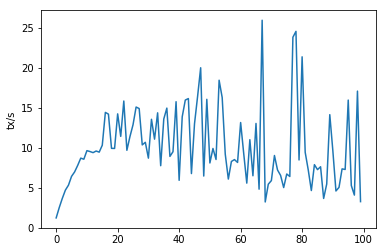

In [25]:
logs_dir = "timelogs"

txsec = []

for i in range(1,101):
    f = open(os.path.join(logs_dir,"times_" + str(i) + ".log"))
    lines = f.readlines()

#         print (lines[3])
    val = lines[3].split(',')
#         print(val)
    txsec.append( 1 / (1e-3 * float(val[0])) * i  ) 

# for filename in os.listdir(logs_dir):
#     if filename.endswith(".log"):
# #         print(filename)
#         f = open(os.path.join(logs_dir,filename))
#         lines = f.readlines()
        
# #         print (lines[3])
#         val = lines[3].split(',')
# #         print(val)
#         txsec.append(val[0])
#         continue
#     else:
#         continue
        
print (txsec)


plt.plot(txsec)
plt.ylabel('tx/s')
plt.show()

In [ ]:
files = ["query1.txt"]
counter  = 1

queries = ['Query: FindVideo']

plt.subplots(figsize=(40, 10))

for file in files:

    with open(file) as f:
        data = []
        for line in f:
            line = line.split(',') # to deal with blank

            if line:            # lines (ie skip them)
                # line = [float(i) for i in line]
                data.append(line)

    labels = []
    for i in range(len(data)-1):
        labels.append(data[i+1][0])

#     print(labels)

    xlabels = []
    for i in range(len(data[0])-1):
        xlabels.append(data[0][i+1].rstrip())

#     print(xlabels)

    val = []

    for i in range(len(data)-1):
        # print data[i]
        new = []
        for j in range(len(data[0])-1):
            new.append(float(data[i+1][j+1]))
        val.append(new)

    for i in range(len(val)):
        val[i] = [float(j) for j in val[i]]

    val = np.array(val).transpose()
#     print(val)

    ind = np.arange(len(labels))
    width = 0.6       # the width of the bars: can also be len(x) sequence

    plt.subplot(130+counter)

    p1 = plt.bar(ind, val[0,:], width)
    p2 = plt.bar(ind, val[1,:], width,
                 bottom=val[0,:])
#     p3 = plt.bar(ind, val[2,:], width,
#                  bottom=val[1,:] + val[0,:])

    plt.title(queries[counter-1], fontsize=16)
    plt.xticks(ind, labels, fontsize=14)
#     plt.yticks(np.arange(0, 21, 5))

    if counter == 1:
        plt.ylabel('Time (ms) per query', fontsize=20)
        
    if counter == 1:
        plt.legend((p1[0], p2[0]), xlabels, fontsize=14)
        
    counter +=1
    
filename = "findVideo"
form = ["pdf", "png"]

for fo in form:
    outputfile = "res_"+ filename + '.' + fo
    plt.savefig(outputfile, format=fo, bbox_inches='tight')

plt.show()
plt.close()

In [ ]:
(10**9 / 8 ) / 9*1024

plt.show()